<a href="https://colab.research.google.com/github/BhaktiPradana/Project-Model-Data-Time-Series/blob/main/MachineLearning_DataTimeSeries_Bhaktipradana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Model Machine Learning dengan Data Time Series**
- Nama: Bhakti Pradana Roesyadi
- Email: bhaktipradana24@gmail.com
- Id Dicoding:bhaktipradana

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.callbacks import History

**Load Datasheet**

In [ ]:
file_path = 'C:\\Users\\Bhakti\\Documents\\city_temperature.csv'
df = pd.read_csv(file_path)
print(df.head())

   Region  Country State     City  Month  Day  Year  AvgTemperature
0  Africa  Algeria   NaN  Algiers      1    1  1995            64.2
1  Africa  Algeria   NaN  Algiers      1    2  1995            49.4
2  Africa  Algeria   NaN  Algiers      1    3  1995            48.8
3  Africa  Algeria   NaN  Algiers      1    4  1995            46.4
4  Africa  Algeria   NaN  Algiers      1    5  1995            47.9


C:\Users\Bhakti\AppData\Local\Temp\ipykernel_25676\482474212.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [ ]:
print(df)

                Region  Country                   State                  City  \
0               Africa  Algeria                     NaN               Algiers   
1               Africa  Algeria                     NaN               Algiers   
2               Africa  Algeria                     NaN               Algiers   
3               Africa  Algeria                     NaN               Algiers   
4               Africa  Algeria                     NaN               Algiers   
...                ...      ...                     ...                   ...   
2906322  North America       US  Additional Territories  San Juan Puerto Rico   
2906323  North America       US  Additional Territories  San Juan Puerto Rico   
2906324  North America       US  Additional Territories  San Juan Puerto Rico   
2906325  North America       US  Additional Territories  San Juan Puerto Rico   
2906326  North America       US  Additional Territories  San Juan Puerto Rico   

         Month  Day  Year  

In [ ]:
dtypes = {'State': 'object'}
df = pd.read_csv(file_path, dtype=dtypes)
print(df['State'].unique())

[nan 'Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Maryland' 'Florida'
 'Georgia' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas'
 'Kentucky' 'Louisiana' 'Maine' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming'
 'Additional Territories']


In [ ]:
print(df.columns)

Index(['Region', 'Country', 'State', 'City', 'Month', 'Day', 'Year',
       'AvgTemperature'],
      dtype='object')


**Data Process**

In [ ]:
df['Date'] = pd.to_datetime(df[['Month', 'Day', 'Year']], errors='coerce')
df['Date'] = df['Date'].apply(lambda x: x.replace(day=1) if pd.notnull(x) else x)

df = df[['Date', 'AvgTemperature']]

df = df.sort_values('Date')
df.set_index('Date', inplace=True)

scaler = MinMaxScaler()
df['AvgTemperature'] = scaler.fit_transform(df[['AvgTemperature']])

train_size = int(len(df) * 0.8)
train, val = df.iloc[:train_size], df.iloc[train_size:]

def create_dataset(dataset, time_steps=1):
    X, Y = [], []
    for i in range(len(dataset)-time_steps):
        a = dataset.iloc[i:(i+time_steps), 0].values
        X.append(a)
        Y.append(dataset.iloc[i + time_steps, 0])
    return np.array(X), np.array(Y)

time_steps = 10
X_train, y_train = create_dataset(train, time_steps)
X_val, y_val = create_dataset(val, time_steps)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

history = History()

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mean_absolute_error', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/10

36329/36329 [==============================] - 198s 5ms/step - loss: 0.0487 - mae: 0.0487 - val_loss: 0.0353 - val_mae: 0.0353
Epoch 2/10
36329/36329 [==============================] - 197s 5ms/step - loss: 0.0473 - mae: 0.0473 - val_loss: 0.0352 - val_mae: 0.0352
Epoch 3/10
36329/36329 [==============================] - 195s 5ms/step - loss: 0.0472 - mae: 0.0472 - val_loss: 0.0353 - val_mae: 0.0353
Epoch 4/10
36329/36329 [==============================] - 197s 5ms/step - loss: 0.0471 - mae: 0.0471 - val_loss: 0.0352 - val_mae: 0.0352
Epoch 5/10
36329/36329 [==============================] - 196s 5ms/step - loss: 0.0471 - mae: 0.0471 - val_loss: 0.0352 - val_mae: 0.0352
Epoch 6/10
36329/36329 [==============================] - 195s 5ms/step - loss: 0.0470 - mae: 0.0470 - val_loss: 0.0351 - val_mae: 0.0351
Epoch 7/10
36329/36329 [==============================] - 195s 5ms/step - loss: 0.0470 - mae: 0.0470 - val_loss: 0.0350 - val_mae: 0.0350
Epoch 8/10
36329/36329 [=========

**Calculate MAE and check against a threshold**

In [ ]:
train_mae = history.history['mae']
val_mae = history.history['val_mae']

for epoch, (train, val) in enumerate(zip(train_mae, val_mae), 1):
    print(f'Epoch {epoch}: Training MAE - {train}, Validation MAE - {val}')


Epoch 1: Training MAE - 0.04874292388558388, Validation MAE - 0.035265594720840454
Epoch 2: Training MAE - 0.04727737233042717, Validation MAE - 0.035151854157447815
Epoch 3: Training MAE - 0.047170065343379974, Validation MAE - 0.03528135269880295
Epoch 4: Training MAE - 0.04710512235760689, Validation MAE - 0.03517518565058708
Epoch 5: Training MAE - 0.0470573715865612, Validation MAE - 0.03521561250090599
Epoch 6: Training MAE - 0.04702601954340935, Validation MAE - 0.035112135112285614
Epoch 7: Training MAE - 0.046990767121315, Validation MAE - 0.035032253712415695
Epoch 8: Training MAE - 0.04695150628685951, Validation MAE - 0.03508947789669037
Epoch 9: Training MAE - 0.04692087695002556, Validation MAE - 0.035088177770376205
Epoch 10: Training MAE - 0.04688486084342003, Validation MAE - 0.03533355891704559


**Batch processing for anomaly detection**

In [ ]:
num_samples = len(predictions)
batch_size = 15000
threshold = 0.05

anomalies = np.zeros_like(predictions, dtype=bool)
for i in range(0, num_samples, batch_size):
    start_idx = i
    end_idx = min(i + batch_size, num_samples)

    batch_anomalies = np.abs(predictions[start_idx:end_idx, 0] - y_val[start_idx:end_idx]) > threshold
    anomalies[start_idx:end_idx, 0] = batch_anomalies

print(f'Jumlah anomali: {np.sum(anomalies)}')

print(f'Threshold: {threshold}')


Jumlah anomali: 100536
Threshold: 0.05


**Visualization average temperature over time**

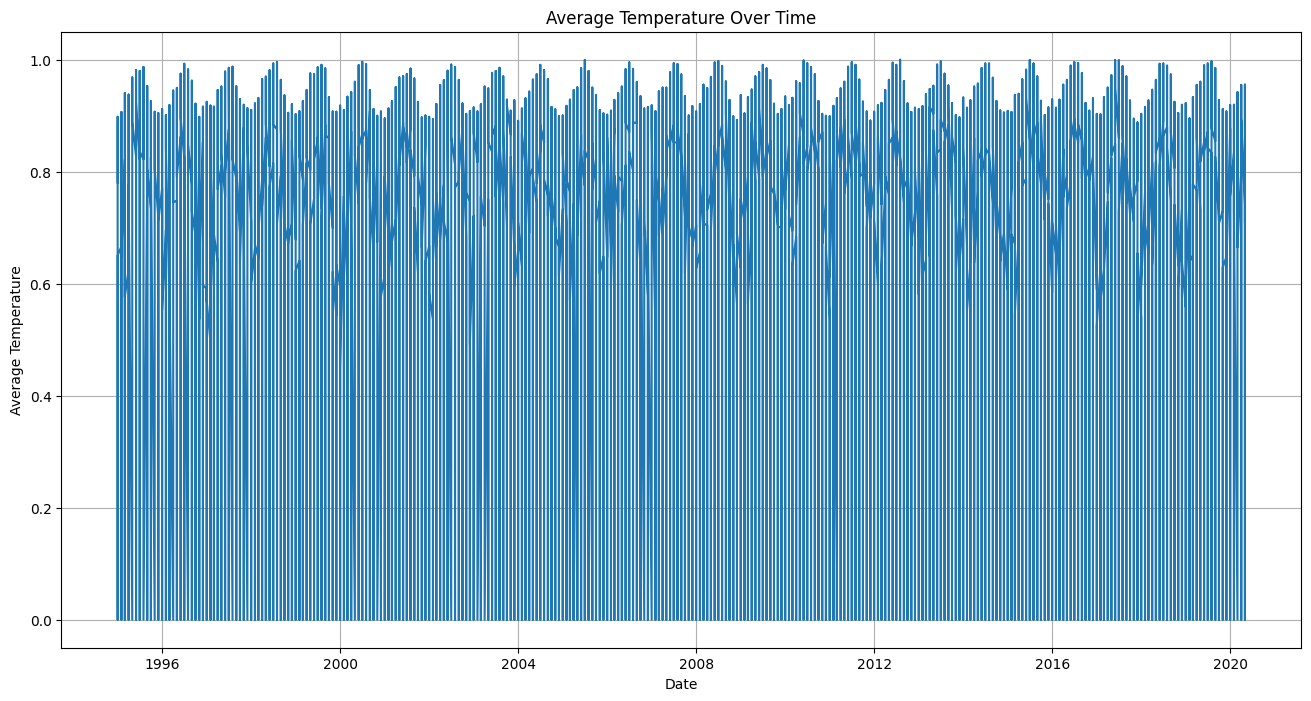

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(df.index, df['AvgTemperature'])
plt.title('Average Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.grid(True)
plt.show()